## 코드 출처 : 
* https://github.com/wjddls0828/traveling_recommendation/blob/main/Crawling/visitJeju_crawling.py
* 크롤링하는 사이트 : https://www.visitjeju.net/kr/detail/list?menuId=DOM_000001718002000000&cate1cd=cate0000000002&cate2cd=cate0000000009#p1&region2cd&pageSize=6&sortListType=reviewcnt&viewType=thumb

In [14]:
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys 
import pandas as pd
import os
from selenium.webdriver.common.by import By

In [15]:

# 크롬창(웹드라이버) 열기
driver = webdriver.Chrome("./chromedriver.exe")

In [16]:

# 성산일출봉 접속하기
driver.get("https://www.visitjeju.net/kr/detail/list?menuId=DOM_000001718002000000&cate1cd=cate0000000002&cate2cd=cate0000000009#p1&region2cd&pageSize=6&sortListType=reviewcnt&viewType=thumb")

time.sleep(1)

# 팝업창 제거
driver.find_element_by_css_selector('#footer > div.add2020_questionnaire > button > span').click()

In [17]:
! python3 -m venv selenium_test #체크용

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [18]:
theme_before=68  #모든 페이지뷰 !!

In [20]:
def get_review(review_list, text_list, tag_list):
    review = review_list.find_elements_by_class_name('review_txt')
    tag = review_list.find_elements_by_class_name('check_list')
    
    for i in range(0, len(review)):
        text_list.append(review[i].text)
        tag_ = tag[i].find_elements_by_css_selector('a')
        
        semi_list = []
        for item in tag_:
            semi_list.append(item.text)
            
        tag_list.append(semi_list)
        time.sleep(1)
        
    return text_list, tag_list

def text_bar_jumping(text_list, tag_list):
    
    review_list = driver.find_element(By.XPATH, '//*[@id="tab3"]')
    review_list.click()
    page_bar = review_list.find_element(By.XPATH, '//*[@id="paging"]')
    pages = page_bar.find_elements_by_css_selector('a')

    isend = False
    page_before=0
    while(isend != True):
        page_now = page_bar.find_element_by_class_name('current').text
        print(page_now)    
        
        if page_now != page_before:
            text_list, tag_list = get_review(review_list, text_list, tag_list)
            page_before = page_now
            page_bar.find_element_by_class_name('spr_com.page-next').send_keys(Keys.ENTER)
            time.sleep(1)
        else :
            isend = True
    
    return text_list, tag_list

def theme_bar_jumping(theme_before):

    theme_bar = driver.find_element(By.XPATH, '//*[@id="paging"]')
    theme_page = theme_bar.find_elements_by_css_selector('a')
      
    theme_now = theme_bar.find_element_by_class_name('current').text

    if theme_now != theme_before:
        theme_before = theme_now
        theme_bar.find_element_by_class_name('spr_com.page-next').send_keys(Keys.ENTER)
        time.sleep(2)
        return theme_before
    else:
        return 0
    
def data_to_csv(place_name, review_list, tag_list):
#데이터프레임으로 저장
    results_df = pd.DataFrame({"name":[place_name]*len(tag_list),"content":review_list,"tags":tag_list})

    #csv파일로 저장
    if(os.path.exists('관광지_자연.csv')):
        results_df.to_csv('관광지_자연.csv',mode='a', encoding='utf-8-sig', header=False)
    else:
        results_df.to_csv('관광지_자연.csv',mode='w', encoding='utf-8-sig')

def get_info(info):
    info_html = driver.find_elements_by_class_name('_grid-system-row_')
    for i in range(0, len(info_html)):
        if len(info_html[i].text)!=0:
            info = info + info_html[i].text
            print(info)
    time.sleep(1)
    return info

In [21]:
while(theme_before != 0) : 
    
    for i in range(0, 6):
        place_page = driver.find_element_by_css_selector('#content > div > div.cont_wrap > div.recommend_area > ul')
        place_list = place_page.find_elements_by_class_name('item_top')
        
        # 특정 여행장소 페이지 입장
        place_name = place_list[i].find_element_by_class_name('s_tit').text 
        place_list[i].click()
        time.sleep(2)
        
        # 장소에 대한 댓글 및 태그 수집
        #크롤링데이터저장할 빈 리스트(text-댓글/ tag-댓글 태그) 
        text_list = []
        tag_list = []
        text_list, tag_list = text_bar_jumping(text_list, tag_list)
        
        # 데이터 저장
        data_to_csv(place_name, text_list, tag_list)
        
        # 여행장소 목록 페이지로 복귀 
        driver.back()
        driver.back()
        time.sleep(3)
        
    # 다음 여행목록 페이지로 이동
    theme_before = theme_bar_jumping(theme_before)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


KeyboardInterrupt: 

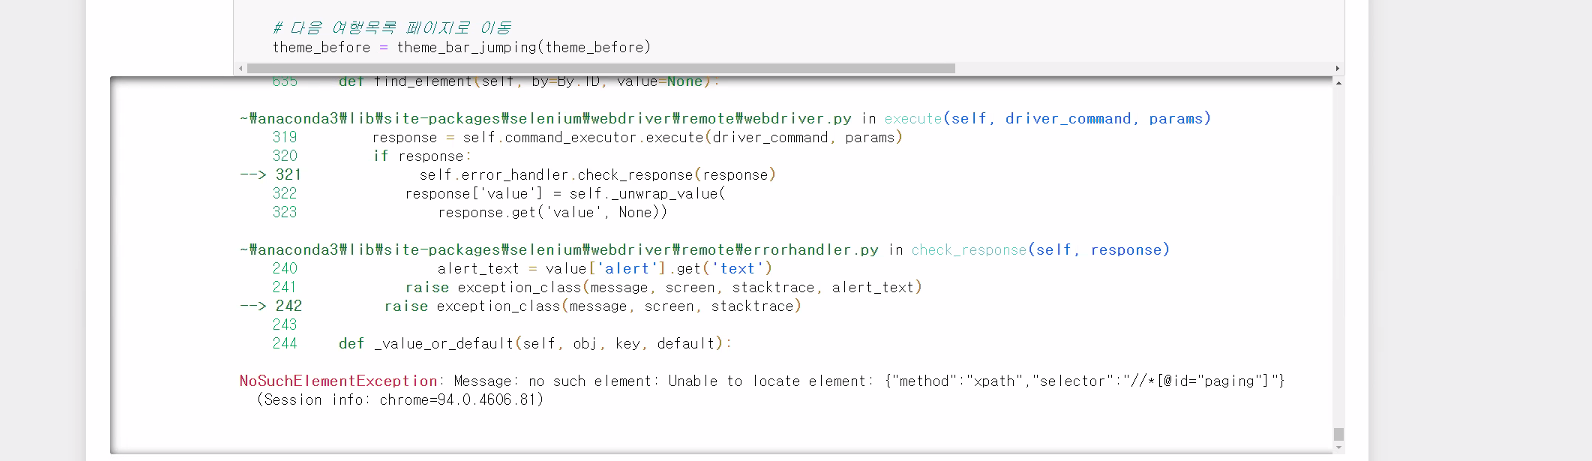

In [ ]:
# 리뷰가 0인경우 종료나 패스가 아니라 에러가 뜸..!!물론 자연어 처리시 리뷰가 없다면 결측치 처리되어 의미가 없지만
# 조금 바꿔서 패스나 종료로 해놓자.

In [6]:

# 관장지-자연
# 전체 페이지수 68

driver.get("https://www.visitjeju.net/kr/detail/list?menuId=DOM_000001718002000000&cate1cd=cate0000000002&cate2cd=cate0000000009#p1&region2cd&pageSize=6&sortListType=reviewcnt&viewType=thumb")

time.sleep(1)


# 이전 여행목록 페이지 번호
theme_before=68

def get_review(review_list, text_list, tag_list):
    review = review_list.find_elements_by_class_name('review_txt')
    tag = review_list.find_elements_by_class_name('check_list')
    
    for i in range(0, len(review)):
        text_list.append(review[i].text)
        tag_ = tag[i].find_elements_by_css_selector('a')
        
        semi_list = []
        for item in tag_:
            semi_list.append(item.text)
            
        tag_list.append(semi_list)
        time.sleep(1)
        
    return text_list, tag_list

def text_bar_jumping(text_list, tag_list):
    
    review_list = driver.find_element(By.XPATH, '//*[@id="tab3"]')
    review_list.click()
    page_bar = review_list.find_element(By.XPATH, '//*[@id="paging"]')
    pages = page_bar.find_elements_by_css_selector('a')

    isend = False
    page_before=0
    while(isend != True):
        page_now = page_bar.find_element_by_class_name('current').text
        print(page_now)    
        
        if page_now != page_before:
            text_list, tag_list = get_review(review_list, text_list, tag_list)
            page_before = page_now
            page_bar.find_element_by_class_name('spr_com.page-next').send_keys(Keys.ENTER)
            time.sleep(1)
        else :
            isend = True
    
    return text_list, tag_list

def theme_bar_jumping(theme_before):

    theme_bar = driver.find_element(By.XPATH, '//*[@id="paging"]')
    theme_page = theme_bar.find_elements_by_css_selector('a')
      
    theme_now = theme_bar.find_element_by_class_name('current').text

    if theme_now != theme_before:
        theme_before = theme_now
        theme_bar.find_element_by_class_name('spr_com.page-next').send_keys(Keys.ENTER)
        time.sleep(2)
        return theme_before
    else:
        return 0
    
def data_to_csv(place_name, review_list, tag_list):
#데이터프레임으로 저장
    results_df = pd.DataFrame({"name":[place_name]*len(tag_list),"content":review_list,"tags":tag_list})

    #csv파일로 저장
    if(os.path.exists('관광지_자연.csv')):
        results_df.to_csv('관광지_자연.csv',mode='a', encoding='utf-8-sig', header=False)
    else:
        results_df.to_csv('관광지_자연.csv',mode='w', encoding='utf-8-sig')

def get_info(info):
    info_html = driver.find_elements_by_class_name('_grid-system-row_')
    for i in range(0, len(info_html)):
        if len(info_html[i].text)!=0:
            info = info + info_html[i].text
            print(info)
    time.sleep(1)
    return info


WebDriverException: Message: chrome not reachable
  (Session info: chrome=94.0.4606.81)
